# Transformações geométricas - Parte 1 do Projeto de Visão

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [249]:
import matplotlib.pyplot as plt

from matplotlib import colors

from sympy import symbols
from sympy.core.trace import Tr
from IPython.core.display import display_pretty
from sympy.printing.latex import *

from sympy import init_printing; init_printing()
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from IPython.display import display

import sympy as sp
import math

from numpy import *
import numpy as np


import cv2

import numpy as np

%matplotlib inline

sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

In [250]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [251]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [252]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [253]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

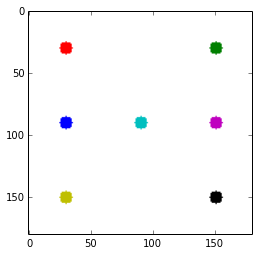

In [254]:
blank_rgb = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [255]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [256]:
saida = cv2.imread("patterns_transformed.png")

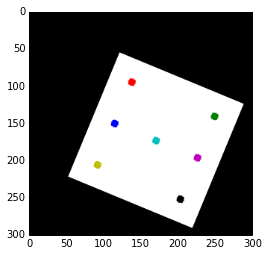

In [257]:
plt.imshow(saida)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# Atividade 1

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima.

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo.

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* 

# Respostas

#### 1) 
Existem 4 graus de liberdade : θ, escala, x da translação e y da translação.

#### 2) 
Sim, é possível descobrir a transformação, descobrindo a matriz perspectiva.

In [258]:
#3)
class ListTable(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

import random
table = ListTable()
table.append(['ponto', 'X entrada', 'Y entrada', 'X saida','Y saida'])
table.append(['vermelho', 30, 30, 135,95])
table.append(["azul ",30,90,115,150])
table.append(["amarelo",30,150,90,205])
table.append(["turquesa",90,90,170,170])
table.append(["verde",150,30,250,140])
table.append(["roxo",150,90,225,195])
table.append(["preto",150,150,200,250])
table


ponto,X entrada,Y entrada,X saida,Y saida
vermelho,30,30,135,95
azul,30,90,115,150
amarelo,30,150,90,205
turquesa,90,90,170,170
verde,150,30,250,140
roxo,150,90,225,195
preto,150,150,200,250


#### 4) 
É preciso de 2 correspondências  Pentrada ⇒ Psaida para descobrir qual é a matriz Transformação.

#### 5)
Seria útil ter mais que 2 correspondências para ter uma maior precisão dos graus de liberdade.

In [259]:
#6)
def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])

pvermelhoi = make_column_point(30, 30)
pazuli = make_column_point(30, 90)
pamareloi = make_column_point(30, 150)
pturquesai = make_column_point(90, 90)
pverdei = make_column_point(150, 150)
proxoi = make_column_point(150, 90)
ppretoi = make_column_point(150, 150)

points_entrada = [pvermelhoi, pazuli, pamareloi,pturquesai, pverdei, proxoi, ppretoi]

pvermelhos = make_column_point(135, 95)
pazuls = make_column_point(115, 150)
pamarelos = make_column_point(90, 205)
pturquesas = make_column_point(170, 170)
pverdes = make_column_point(250, 140)
proxos = make_column_point(225, 195)
ppretos = make_column_point(200, 250)

points_saida = [pvermelhos, pazuls, pamarelos,pturquesas, pverdes, proxos, ppretos]

In [260]:
points_entrada

⎡⎡30⎤, ⎡30⎤, ⎡30 ⎤, ⎡90⎤, ⎡150⎤, ⎡150⎤, ⎡150⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎢⎢30⎥  ⎢90⎥  ⎢150⎥  ⎢90⎥  ⎢150⎥  ⎢90 ⎥  ⎢150⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎣⎣1 ⎦  ⎣1 ⎦  ⎣ 1 ⎦  ⎣1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦⎦

In [261]:
points_saida

⎡⎡135⎤, ⎡115⎤, ⎡90 ⎤, ⎡170⎤, ⎡250⎤, ⎡225⎤, ⎡200⎤⎤
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎢⎢95 ⎥  ⎢150⎥  ⎢205⎥  ⎢170⎥  ⎢140⎥  ⎢195⎥  ⎢250⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎣⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦⎦

In [262]:
alpha, beta, t_x, t_y =  sp.symbols("alpha, beta, t_x, t_y")

In [263]:
MatrixM = sp.Matrix([[alpha, -beta, t_x],[-beta, -alpha, t_y],[0, 0, 1]])


In [264]:
equations = []
system_eq = [] 
left_side = [] 

for p in points_entrada:
    produto = MatrixM*p
    equations.append(produto)

print("Equaçōes do sistema sobredeterminado (todas as equaçōe são iguais a 0):")
    
for i in range(len(equations)):
    for j in range(len(equations[i][:-1])):
        eq = equations[i][j]-points_saida[i][j]
        left_side.append(equations[i][j])
        system_eq.append(eq)

for equation in system_eq:
    display(equation)

Equaçōes do sistema sobredeterminado (todas as equaçōe são iguais a 0):


In [291]:
A = np.array([
    [30,-30,1,0],
    [-30,-30,0,1],
    [30,-90,1,0],
    [-90,-30,0,1],
    [30,-150,1,0],
    [-150,-30,0,1],
    [90,-90,1,0],
    [-90,-90,0,1],
    [150,-150,1,0],
    [-150,-150,0,1],
    [150,-90,1,0],
    [-90,-150,0,1],
    [150,-150,1,0],
    [-150,-150,0,1]])

b = np.array([135,95,115,150,90,205,170,170,250,140,225,195,200,250])

sol = np.linalg.lstsq(A, b)

a = (sol[0][0])
b = (sol[0][1])
tx = (sol[0][2])
ty = (sol[0][3])

thetar = math.atan(b/a) #em radiano
thetag = math.degrees(thetar) #em graus 

escala = (a/math.cos(thetar))
print(thetag)
print(escala)
print(tx)
print(ty)
print(sol)

-48.3286499917
0.476672769723
102.613636364
174.053030303
(array([   0.31691919,   -0.35606061,  102.61363636,  174.0530303 ]), array([ 28401.89393939]), 4, array([ 413.5282464 ,  413.5282464 ,    1.17874005,    1.17874005]))


In [266]:
print("Para esse metodo os graus de liberdade deram: ")
print("θ = -48.328°")
print("escala = 0.476")
print("translação em x= 102.613")
print("tranlação em y = 174.05")

Para esse metodo os graus de liberdade deram: 
θ = -48.328°
escala = 0.476
translação em x= 102.613
tranlação em y = 174.05


In [267]:
import sympy 
from sympy.solvers import solve
from sympy import Symbol
from sympy import Matrix, solve_linear_system
from sympy.abc import a, b, x, y
'''
system= Matrix((
    (30,-30,1,0,135),
    (-30,-30,0,1,95),
    (30,-90,1,0,115),
    (-90,-30,0,1,150),
    (30,-150,1,0,90),
    (-150,-30,0,1,205),
    (90,-90,1,0,170),
    (-90,-90,0,1,170),
    (150,-150,1,0,250),
    (-150,-150,0,1,140),
    (150,-90,1,0,225),
    (-90,-150,0,1,195),
    (150,-150,1,0,200),
    (-150,-150,0,1,250)
    ))
'''

system= Matrix((
    (30,-30,1,0,135),
    (-30,-30,0,1,95),
    (30,-90,1,0,115),
    (-90,-30,0,1,150),
    ))


               
res = solve_linear_system(system, a, b, x, y)


thetar = math.atan(res[b]/res[a]) #em radiano
thetag = math.degrees(thetar) #em graus 

escala = (res[a]/math.cos(thetar))

print(thetag)
print(escala)
#print(res[x])
#print(res[y])
tx1= 345/2
ty1= 155/2
print(tx1)
print(ty1)

-19.9831065219
-0.975391659226635
172
77


In [268]:
print("Para esse metodo os graus de liberdade deram: ")
print("θ = -19.98°")
print("escala = -0.97")
print("translação em x= 172")
print("tranlação em y = 77")

Para esse metodo os graus de liberdade deram: 
θ = -19.98°
escala = -0.97
translação em x= 172
tranlação em y = 77


In [269]:
system2= Matrix((
    (30,-150,1,0,90),
    (-150,-30,0,1,205),
    (150,-150,1,0,250),
    (-150,-150,0,1,140),
    ))

res2 = solve_linear_system(system2, a, b, x, y)

thetar = math.atan(res2[b]/res2[a]) #em radiano
thetag = math.degrees(thetar) #em graus 

escala = (res2[a]/math.cos(thetar))

print(thetag)
print(escala)
# print(res2[x])
# print(res2[y])
tx2= 525/4
ty2= 1685/4
print(tx2)
print(ty2)

22.1094483438
1.43915966993088
131
421


In [270]:
print("Para esse metodo os graus de liberdade deram: ")
print("θ =22.10°")
print("escala = 1.43")
print("translação em x= 131")
print("tranlação em y = 421")

Para esse metodo os graus de liberdade deram: 
θ =22.10°
escala = 1.43
translação em x= 131
tranlação em y = 421


In [271]:
system3= Matrix((
    (90,-90,1,0,170),
    (-90,-90,0,1,170),
    (150,-150,1,0,250),
    (-150,-150,0,1,140),
    ))

res3 = solve_linear_system(system3, a, b, x, y)

thetar = math.atan(res3[b]/res3[a]) #em radiano
thetag = math.degrees(thetar) #em graus 

escala = (res3[a]/math.cos(thetar))

print(thetag)
print(escala)
print(res3[x])
print(res3[y])

-24.4439547804
1.00692049779955
50
215


In [272]:
print("Para esse metodo os graus de liberdade deram: ")
print("θ =-24.44°")
print("escala = 1.006")
print("translação em x= 50")
print("tranlação em y = 215")

Para esse metodo os graus de liberdade deram: 
θ =-24.44°
escala = 1.006
translação em x= 50
tranlação em y = 215


In [281]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

img = blank
rows,cols = img.shape[:2]

# Source points
srcTri = np.array([(0,0),(cols-1,0),(0,rows-1)], np.float32)

# Corresponding Destination Points. Remember, both sets are of float32 type
dstTri = np.array([(cols*0.0,rows*0.33),(cols*0.85,rows*0.25), (cols*0.15,rows*0.7)],np.float32)

# Affine Transformation
warp_mat = np.array([[alp, -bet,tx], [-bet,-alp,ty]])   # Generating affine transform matrix of size 2x3
dst = cv2.warpAffine(img,warp_mat,(cols,rows))     # Now transform the image, notice dst_size=(cols,rows), not (rows,cols)

warp_mat1 = np.array([[float(res[a]), float(-res[b]),float(res[x])], [float(-res[b]),float(-res[a]),float(res[y])]])   # Generating affine transform matrix of size 2x3
dst1 = cv2.warpAffine(img,warp_mat1,(cols,rows))

warp_mat2 = np.array([[float(res2[a]), float(-res2[b]),float(res2[x])], [float(-res2[b]),float(-res2[a]),float(res2[y])]])   # Generating affine transform matrix of size 2x3
dst2 = cv2.warpAffine(img,warp_mat2,(cols,rows))

warp_mat3 = np.array([[float(res3[a]), float(-res3[b]),float(res3[x])], [float(-res3[b]),float(-res3[a]),float(res3[y])]])   # Generating affine transform matrix of size 2x3
dst3 = cv2.warpAffine(img,warp_mat3,(cols,rows))

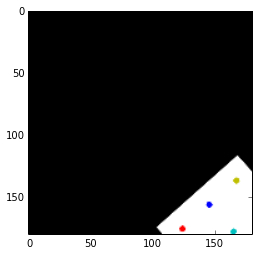

In [293]:
plt.imshow(dst) #Melhor resultado -> graus de liberdades descobertos usando numpy.linalg.lstsq

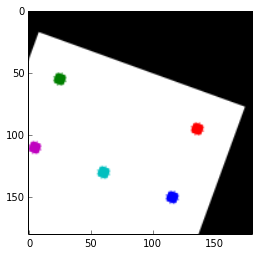

In [287]:
plt.imshow(dst1)

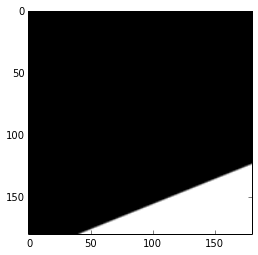

In [289]:
plt.imshow(dst2)

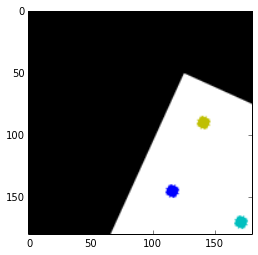

In [290]:
plt.imshow(dst3)

## Referências



[Shapiro and Shepard. Computer Vision. Seção 11.2, Capítulo 11](https://courses.cs.washington.edu/courses/cse576/book/ch11.pdf)

[http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0](http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html#gsc.tab=0)

